In [79]:
#Importing Packages

! pip install feature_engine

In [80]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings("ignore")

In [81]:
df = pd.read_excel('Online Retail.xlsx')

In [82]:
#Check Dataset

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1028 non-null   object        
 1   StockCode    1028 non-null   object        
 2   Description  1027 non-null   object        
 3   Quantity     1028 non-null   int64         
 4   InvoiceDate  1028 non-null   datetime64[ns]
 5   UnitPrice    1028 non-null   float64       
 6   CustomerID   1027 non-null   float64       
 7   Country      1028 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 64.4+ KB


In [84]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,1028.000000,1028.000000,1027.000000
mean,12.490272,3.020691,15988.949367
std,37.940081,5.825003,1852.063137
min,-24.000000,0.000000,12431.000000
25%,1.000000,1.250000,14688.000000
50%,4.000000,2.100000,16098.000000
75%,12.000000,3.750000,17897.000000
max,600.000000,165.000000,18085.000000


In [85]:
df.nunique()

InvoiceNo       68
StockCode      608
Description    609
Quantity        44
InvoiceDate     58
UnitPrice       62
CustomerID      50
Country          4
dtype: int64

In [86]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64

In [87]:
#Country

df.Country.value_counts(normalize=True)

United Kingdom    0.964981
France            0.019455
Australia         0.013619
Netherlands       0.001946
Name: Country, dtype: float64

In [88]:
df = df[df.Country == 'United Kingdom']

In [89]:
#Quantity

df = df[df.Quantity > 0]

In [90]:
#InvoiceDate

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Date'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [91]:
#timebound

print(df["InvoiceDate"].min())
print(df["InvoiceDate"].max())
print("The data is from 1 year transaction")

2010-12-01 08:26:00
2010-12-01 12:49:00
The data is from 1 year transaction


In [92]:
#UnitPrice

df = df[df.UnitPrice > 0]

In [93]:
#CustomerID

df = df[pd.notnull(df['CustomerID'])]

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1027
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceNo         981 non-null    object        
 1   StockCode         981 non-null    object        
 2   Description       981 non-null    object        
 3   Quantity          981 non-null    int64         
 4   InvoiceDate       981 non-null    datetime64[ns]
 5   UnitPrice         981 non-null    float64       
 6   CustomerID        981 non-null    float64       
 7   Country           981 non-null    object        
 8   InvoiceYearMonth  981 non-null    int64         
 9   Date              981 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 84.3+ KB


In [95]:
#Aggregating the Orders by Month

df_agg= df.groupby("Date").Quantity.sum()
df_agg.head()

Date
2010-12    12271
Name: Quantity, dtype: int64

In [96]:
#converting series to dataframe and resetting index.

df_agg=pd.DataFrame(df_agg)
df_agg=df_agg.reset_index()
df_agg.head()

,Date,Quantity
0,2010-12,12271


In [97]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Quantity', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.plot(x, y, color='tab:Blue', marker='o')
    plt.show()

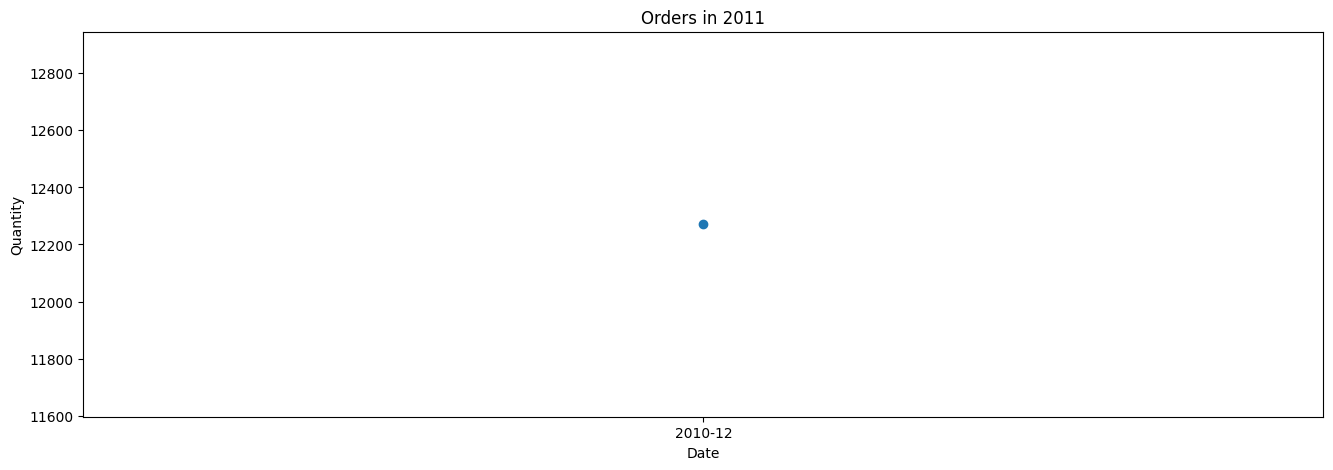

In [98]:
plot_df(df_agg, x=df_agg.Date, y=df_agg.Quantity,title='Orders in 2011')

In [99]:
#Calculating Revenue
#Revenue = Order Count * Average Revenue per Order

df['Revenue'] = df['Quantity']*df['UnitPrice']

<Axes: ylabel='Revenue'>

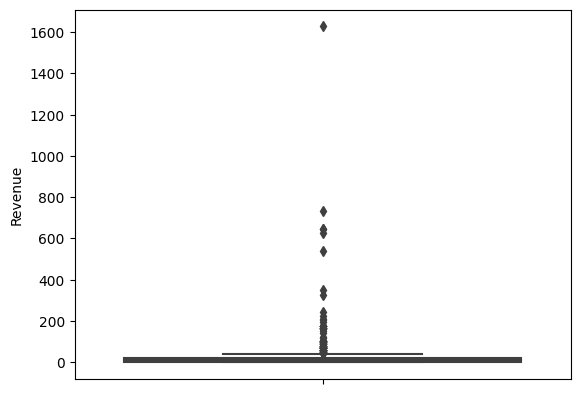

In [100]:
sns.boxplot(y=df['Revenue'])

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1027
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   InvoiceNo         981 non-null    object        
 1   StockCode         981 non-null    object        
 2   Description       981 non-null    object        
 3   Quantity          981 non-null    int64         
 4   InvoiceDate       981 non-null    datetime64[ns]
 5   UnitPrice         981 non-null    float64       
 6   CustomerID        981 non-null    float64       
 7   Country           981 non-null    object        
 8   InvoiceYearMonth  981 non-null    int64         
 9   Date              981 non-null    object        
 10  Revenue           981 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 92.0+ KB


In [102]:
#Monthly Revenue

df_revenue = df.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
df_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,23385.19


In [103]:
plot_data = [
    go.Scatter(
        x=df_revenue['InvoiceYearMonth'],
        y=df_revenue['Revenue'],
        mode='lines+markers'
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [104]:
NOW = dt.date(2011,12,9)
df['Date'] = pd.DatetimeIndex(df.InvoiceDate).date

In [105]:
#Recency

df_recency = df.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.columns = ['CustomerID','Last_Purchase_Date']

df_recency['Recency'] = df_recency.Last_Purchase_Date.apply(lambda x:(NOW - x).days)
df_recency.drop(columns=['Last_Purchase_Date'],inplace=True)
df_recency.head()

,CustomerID,Recency
0,12748.0,373
1,12838.0,373
2,13047.0,373
3,13255.0,373
4,13408.0,373


In [106]:
#Frequency - Monetarty

FM_Table = df.groupby('CustomerID').agg({'InvoiceNo'   : lambda x:len(x),
                                         'Revenue'  : lambda x:x.sum()})
FM_Table.rename(columns = {'InvoiceNo' :'Frequency',
                           'Revenue':'Monetary'},inplace= True)
FM_Table.head()

,Frequency,Monetary
CustomerID,,
12748.0,1,4.95
12838.0,59,390.79
13047.0,17,366.63
13255.0,6,225.70
13408.0,11,1024.68


In [107]:
RFM_Table = df_recency.merge(FM_Table,left_on='CustomerID',right_on='CustomerID')
RFM_Table.head()

,CustomerID,Recency,Frequency,Monetary
0,12748.0,373,1,4.95
1,12838.0,373,59,390.79
2,13047.0,373,17,366.63
3,13255.0,373,6,225.70
4,13408.0,373,11,1024.68


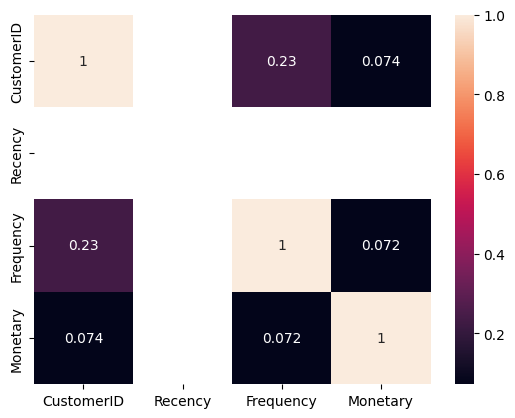

In [108]:
#Heatmap check
sns.heatmap(RFM_Table.corr(), annot=True);

In [109]:
quantiles = RFM_Table.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [110]:
segmented_rfm = RFM_Table.copy()

In [111]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [112]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,12748.0,373,1,4.95,1,4,4
1,12838.0,373,59,390.79,1,1,2
2,13047.0,373,17,366.63,1,2,2
3,13255.0,373,6,225.70,1,3,4
4,13408.0,373,11,1024.68,1,3,1


In [113]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [114]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,12748.0,373,1,4.95,1,4,4,144
1,12838.0,373,59,390.79,1,1,2,112
2,13047.0,373,17,366.63,1,2,2,122
3,13255.0,373,6,225.70,1,3,4,134
4,13408.0,373,11,1024.68,1,3,1,131


In [115]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [116]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,12748.0,373,1,4.95,1,4,4,144,9
1,12838.0,373,59,390.79,1,1,2,112,4
2,13047.0,373,17,366.63,1,2,2,122,5
3,13255.0,373,6,225.70,1,3,4,134,8
4,13408.0,373,11,1024.68,1,3,1,131,5


In [117]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Best Customers:  3
Loyal Customers:  11
Big Spenders:  11
Almost Lost:  4
Lost Customers:  0
Lost Cheap Customers:  0


In [118]:
# Setting up the label for each client and adding the column "Label" to the dataframe

label = [0] * len(segmented_rfm)

for i in range(0,len(segmented_rfm)):

    if segmented_rfm['RFM_Segment'][i] == '111':
        label[i] = "Best Customers"

    elif segmented_rfm['RFM_Segment'][i] == '134' :
        label[i] = "Almost Lost"

    elif segmented_rfm['RFM_Segment'][i] == '344':
        label[i] = "Lost Customers"

    elif segmented_rfm['RFM_Segment'][i] == '444':
        label[i] = "Lost Cheap Customers"

    elif segmented_rfm['F_quartile'][i] == 1:
        label[i] = "Loyal Customers"

    elif segmented_rfm['M_quartile'][i] == 1:
        label[i] = "Big Spenders"

    else:
        label[i] = "Others"

In [119]:
# Adding the 'Label' column to our dataframe

segmented_rfm['Label'] = label

In [120]:
# Count the frequency that a value occurs in a dataframe column for the labels.

segmented_rfm['Label'].value_counts()

Others             22
Loyal Customers     8
Big Spenders        8
Almost Lost         4
Best Customers      3
Name: Label, dtype: int64

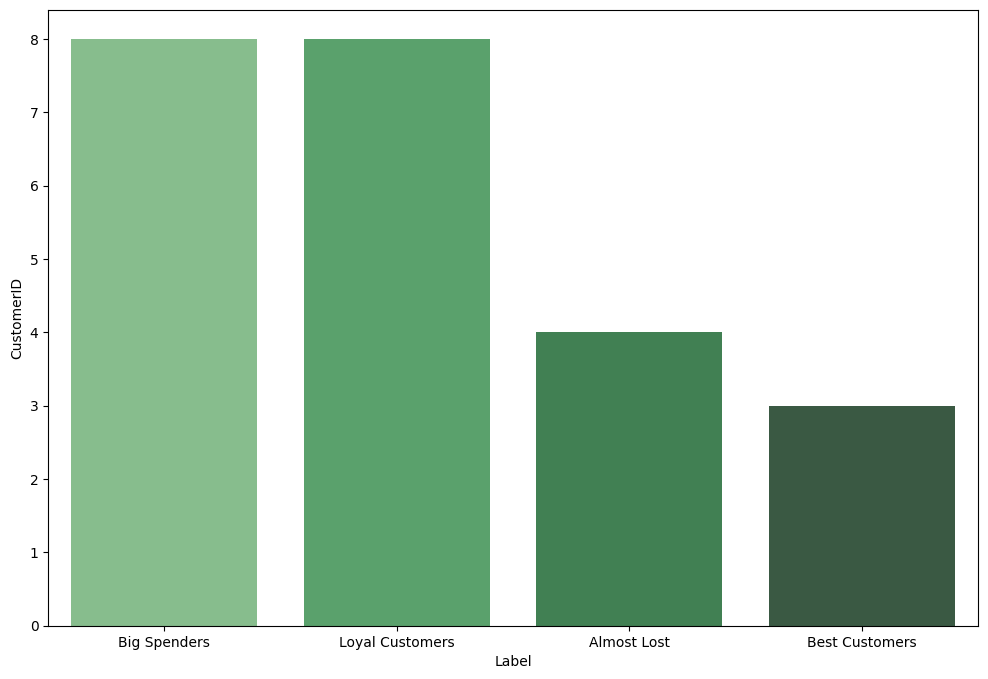

In [121]:
import seaborn as sns
sq1=segmented_rfm.groupby('Label')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sq1.drop([0],inplace=True)
sns.barplot(data=sq1, x="Label", y="CustomerID", palette = "Greens_d");

In [122]:
RFM_Table_New = RFM_Table.drop('CustomerID', axis=1)

In [123]:
RFM_Table_New.head()

,Recency,Frequency,Monetary
0,373,1,4.95
1,373,59,390.79
2,373,17,366.63
3,373,6,225.70
4,373,11,1024.68


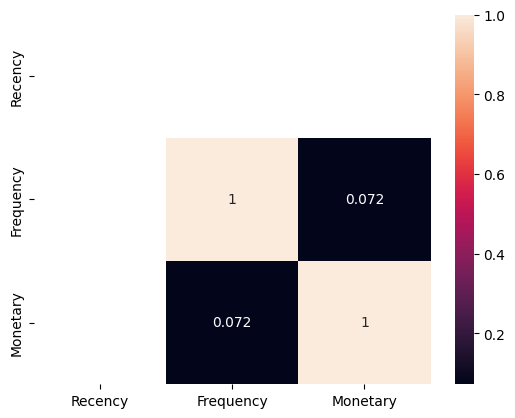

In [124]:
#Heatmap check
sns.heatmap(RFM_Table_New.corr(), annot=True);

<Axes: xlabel='Recency', ylabel='Density'>

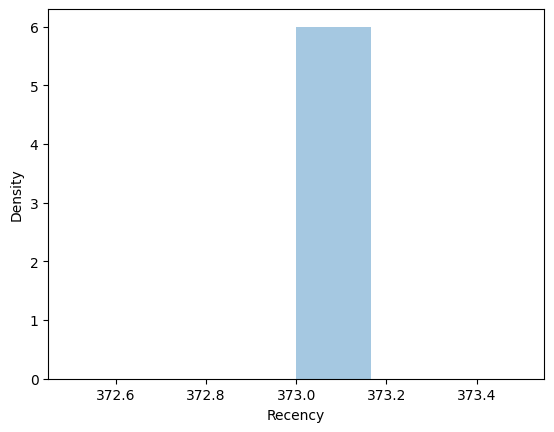

In [125]:
#Analyze distribution

sns.distplot(RFM_Table_New['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

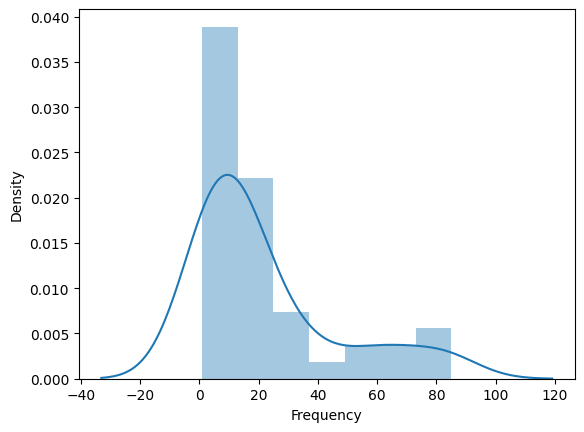

In [126]:
sns.distplot(RFM_Table_New['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

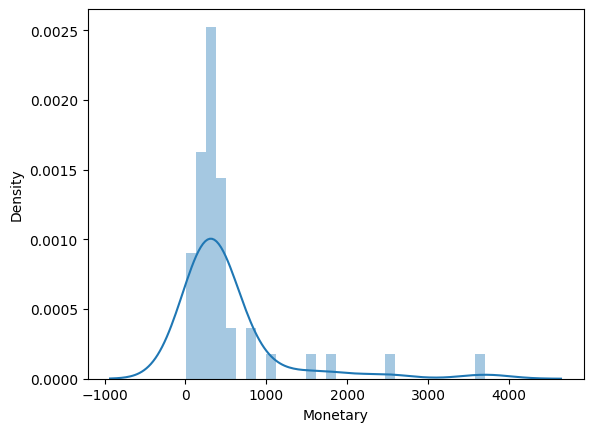

In [127]:
sns.distplot(RFM_Table_New['Monetary'])

In [128]:
df_rfm_log = RFM_Table_New.copy()
df_rfm_log.head()

,Recency,Frequency,Monetary
0,373,1,4.95
1,373,59,390.79
2,373,17,366.63
3,373,6,225.70
4,373,11,1024.68


In [129]:
df_rfm_log = np.log(df_rfm_log+1)

In [130]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [131]:
df_rfm_log = windsoriser.transform(df_rfm_log)

In [132]:
#Developing preprocessing with StandardScaler

scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_New_scaled = scaler.transform(df_rfm_log)

In [133]:
RFM_Table_New_scaled = pd.DataFrame(RFM_Table_New_scaled, columns=RFM_Table_New.columns)
RFM_Table_New_scaled.head()

,Recency,Frequency,Monetary
0,-8.881784e-16,-1.628855,-2.352043
1,-8.881784e-16,1.354662,0.194008
2,-8.881784e-16,0.298542,0.124984
3,-8.881784e-16,-0.529936,-0.399288
4,-8.881784e-16,-0.057131,1.237657


<Axes: xlabel='Recency', ylabel='Density'>

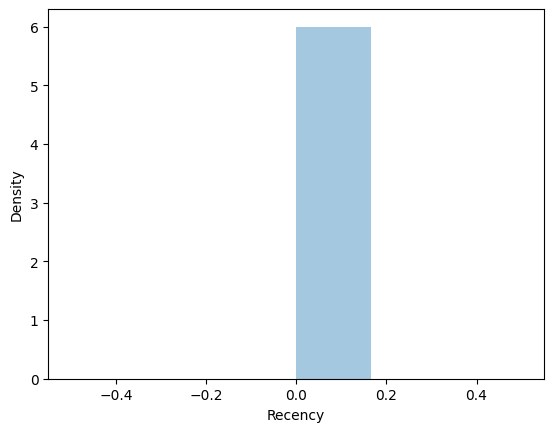

In [134]:
#Analyze distribution

sns.distplot(RFM_Table_New_scaled['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

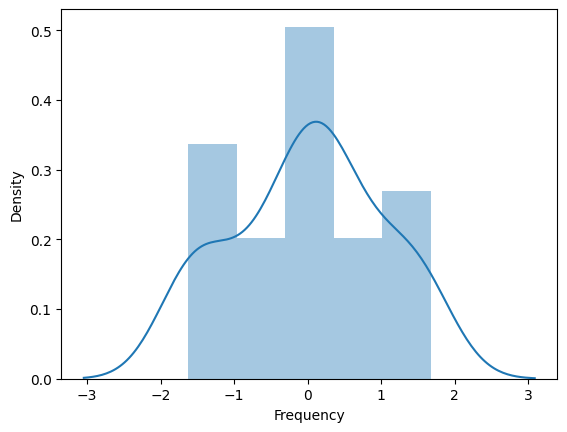

In [135]:
sns.distplot(RFM_Table_New_scaled['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

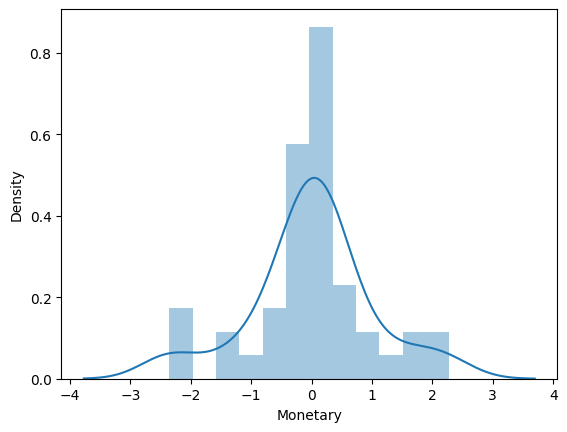

In [136]:
sns.distplot(RFM_Table_New_scaled['Monetary'])

In [137]:
X = np.asarray(RFM_Table_New_scaled)

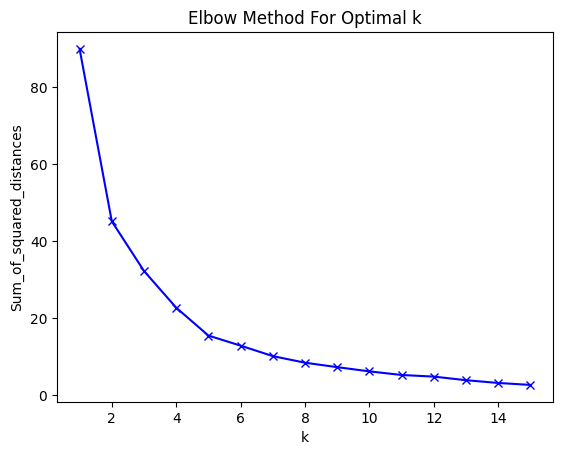

In [138]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [139]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):

    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extract cluster labels
    cluster_labels = kmeans.labels_

    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)

    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)

    # Plot t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")

    return df_new

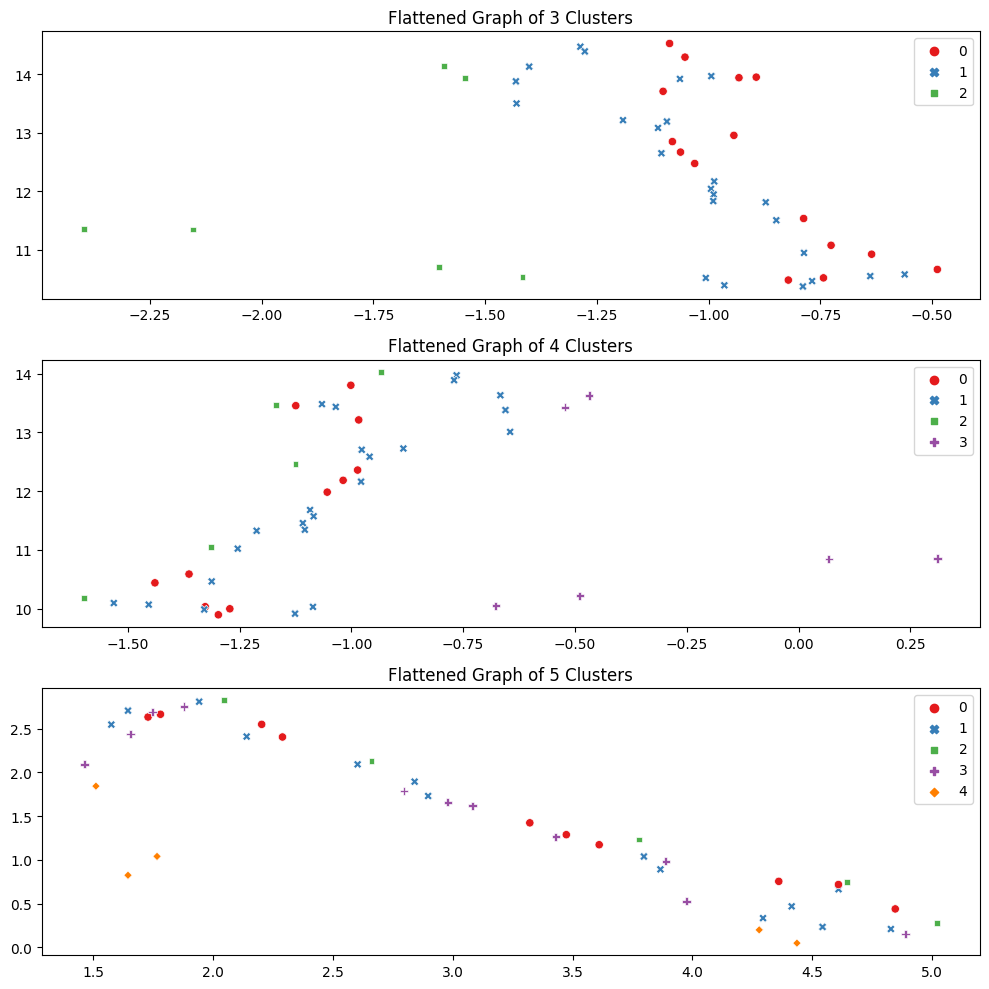

In [140]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_New_scaled, 3, RFM_Table)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_New_scaled, 4, RFM_Table)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_New_scaled, 5, RFM_Table)

plt.tight_layout()


In [141]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm,
                                       index=RFM_Table.index,
                                       columns=RFM_Table.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(),
                        id_vars=['CustomerID', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'],
                        var_name='Metric',
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')

    return

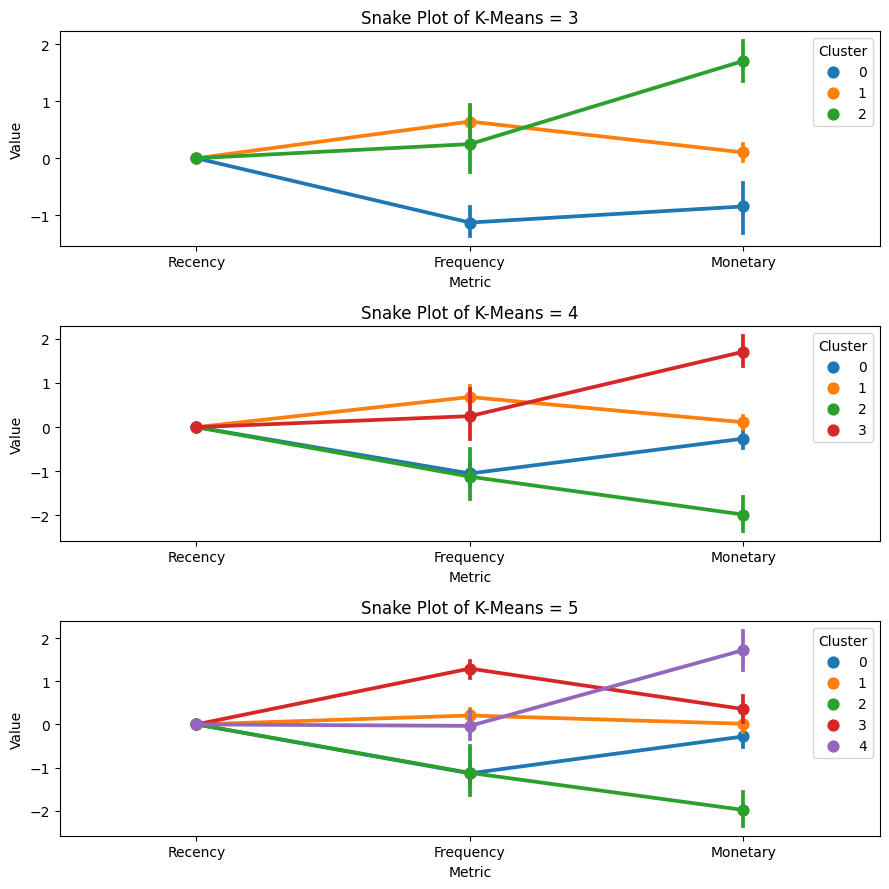

In [142]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_New_scaled, df_rfm_k3, RFM_Table)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_New_scaled, df_rfm_k4, RFM_Table)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_New_scaled, df_rfm_k5, RFM_Table)

plt.tight_layout()

In [143]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [144]:
print(davies_bouldin_score(X, kmeans.labels_))

0.8403054532454841


K-Means = 4

In [145]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [146]:
print(davies_bouldin_score(X, kmeans.labels_))

0.8188275520095392


In [147]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

In [148]:
print(davies_bouldin_score(X, kmeans.labels_))

0.754832127266303


In [149]:
df_rfm_k4.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12748.0,373,1,4.95,2
1,12838.0,373,59,390.79,1
2,13047.0,373,17,366.63,1
3,13255.0,373,6,225.70,0
4,13408.0,373,11,1024.68,3


In [150]:
df_rfm_k4.Cluster.value_counts()

1    23
0    11
3     6
2     5
Name: Cluster, dtype: int64

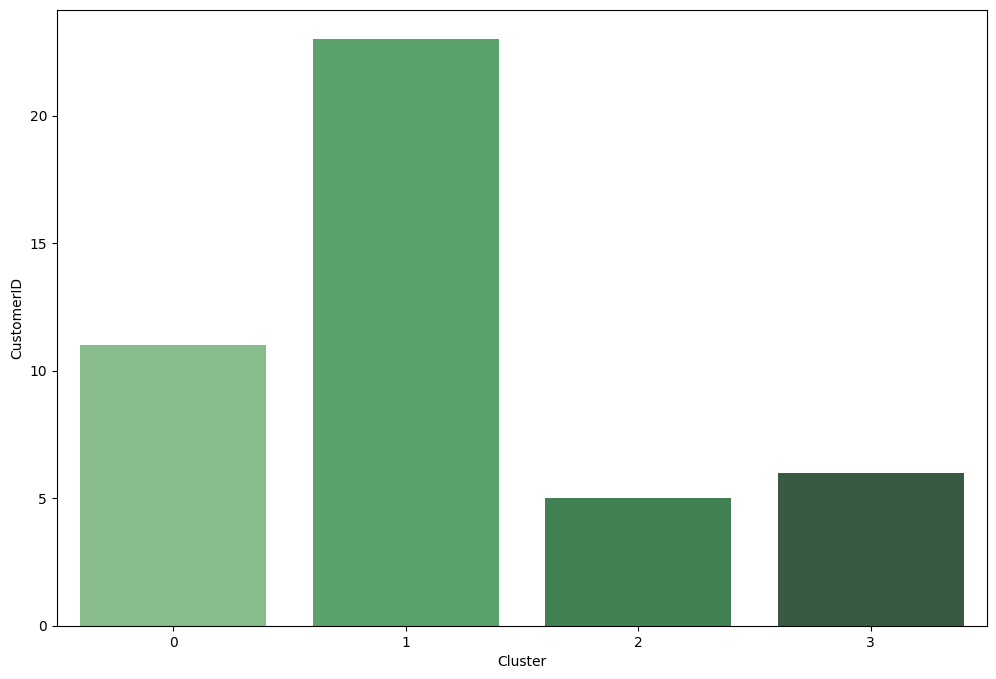

In [151]:
import seaborn as sns
sq1=df_rfm_k4.groupby('Cluster')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.barplot(data=sq1, x="Cluster", y="CustomerID", palette = "Greens_d");

In [152]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)

    return df_new

In [153]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         373.0       4.0    269.0    11
1         373.0      34.0    383.0    23
2         373.0       4.0     50.0     5
3         373.0      24.0   1895.0     6